<a href="https://colab.research.google.com/github/FahadQasim283/AI/blob/main/hill_slimbing_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

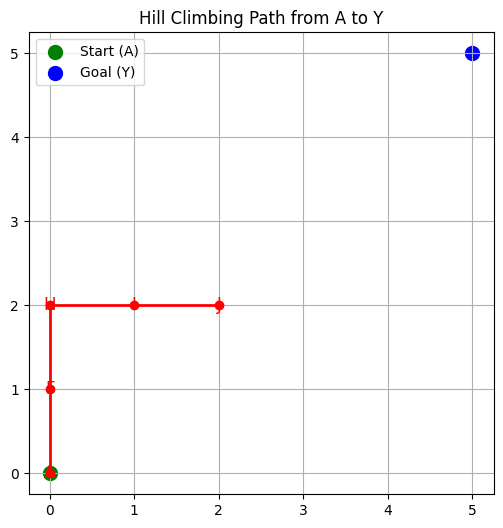

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
grid = np.array([
    ['A', ' ', 'B', 'C', 'D', 'E'],
    ['F', ' ', 'G', ' ', ' ', ' '],
    ['H', 'I', 'J', ' ', 'K', 'L'],
    ['M', 'N', ' ', 'O', 'P', 'Q'],
    ['R', 'S', 'T', 'U', ' ', 'V'],
    [' ', ' ', 'W', ' ', 'X', 'Y']
])

# Define start and goal positions
start = (0, 0)  # Position of 'A'
goal = (5, 5)   # Position of 'Y'

def manhattan_distance(a, b):
    """Calculate Manhattan distance between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(position):
    """Return valid neighbors that are not blocked."""
    x, y = position
    moves = [(0, 1), (1, 0), (-1, 0), (0, -1)]  # Right, Down, Up, Left
    neighbors = []

    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < 6 and 0 <= ny < 6 and grid[nx][ny] != ' ':
            neighbors.append((nx, ny))

    return neighbors

def hill_climbing(start, goal):
    """Perform hill climbing from start to goal."""
    current = start
    path = [current]

    while current != goal:
        neighbors = get_neighbors(current)

        # Select the best neighbor based on Manhattan distance
        best_move = min(neighbors, key=lambda pos: manhattan_distance(pos, goal), default=None)

        if best_move and manhattan_distance(best_move, goal) < manhattan_distance(current, goal):
            current = best_move
            path.append(current)
        else:
            break  # Stop if no improvement

    return path

# Run the hill climbing algorithm
path = hill_climbing(start, goal)

# Plot the path
def plot_path(path):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xticks(range(6))
    ax.set_yticks(range(6))
    ax.set_xticklabels(range(6))
    ax.set_yticklabels(range(6))
    ax.grid(True)

    for step in path:
        ax.text(step[1], step[0], grid[step[0]][step[1]], ha='center', va='center', fontsize=12, color='red')

    # Plot the start and goal
    ax.scatter(start[1], start[0], color='green', s=100, label='Start (A)')
    ax.scatter(goal[1], goal[0], color='blue', s=100, label='Goal (Y)')

    # Plot the path
    x_vals = [pos[1] for pos in path]
    y_vals = [pos[0] for pos in path]
    ax.plot(x_vals, y_vals, color='red', linewidth=2, marker='o')

    plt.legend()
    plt.title("Hill Climbing Path from A to Y")
    plt.show()

# Show the graph
plot_path(path)
